# Problem Set 1 - Zane Bayer - CS520 - (3/8/2022)

## *Learning from Data* exercises

### EX. 1.1

### a. X is the space of all possible medical histories and symptoms. Y is the space of all possible underlying problems/diseases. f is the function which maps the medical histories and symptoms to an underlying problem, in other words, its a diagnosis function.

### b. X is the space of all possible handwritten digits. Depending on the specific task Y could simply be [0,1,2,3,4,5,6,7,8,9] or a space of multiple digit numbers. For instance, The Y space for the MNIST dataset is [0,1,2,3,4,5,6,7,8,9], but for the task of zipcode recognition Y is the space of all 5 digit combinations. f is th function which maps handwritten digits to the numeric space Y, in other words, its an identification function.

### c. X is the space of all possible emails and Y is simply the binary space [spam, not spam]. f is function which maps emails to the binary space [spam, not spam] and thus identifies them as such.

### d. X is the space of all possible combinations of [price,temperature,weekday]. Y is the space of all possible electric load values. f is the function which assigns a load value to each set of values [price,temperature,weekday], so it acts as an evaluation function.

### e. X is the space of all possible data (not just the data available to us) and Y is the space of all all possible outputs. f is the 'true', underlying function which maps the space of all inputs X to the space of all outputs Y.  

### EX. 1.2

### a. Large, positive weights will be associated with words which are likely to appear in spam messages. Looking through my own spam folder reveals that words such as 'deal', 'congratulations', and 'free' would likely have large weights assigned to them.

### b. Large, negative weights will be associated with words which are unlikely to appear in spam messages. These words migh include nicknames and other personal information.

### c. The bias b would directly affect the borderline messages and how many are classified as spam.



### EX. 1.3

### a. Show that $y(t)\vec{w}^{T}(t)\vec{x}(t)<0$ when $\vec{x}(t)$ is misclassified.

### If $\vec{x}(t)$ is misclassified by the model, then by definition $\vec{w}(t)^{T}\vec{x}(t)$ and $y(t)$ have opposite signs. That is, if the point is misclassified, then $sign(\vec{w}^{T}(t)\vec{x}(t))=-sign(y(t))$. Since one of the multipliers is alaways negative, it follows that $y(t)\vec{w}^{T}(t)\vec{x}(t)<0$ when $\vec{x}(t)$ is misclassified.



### b. Show that  $y(t)\vec{w}^{T}(t+1)\vec{x}(t)>y(t)\vec{w}^{T}(t)\vec{x}(t)$
### The update rule for the perceptron is 
### <center>$\vec{w}(t+1)=\vec{w}(t)+\vec{y}(t)\vec{x}(t)$</center>
### If we sub this into the LHS of the inequality above, we get
### <center>$y(t)(\vec{w}(t)+y(t)\vec{x}(t))^{T}\vec{x}(t)$
### distributing gives
### <center>$y(t)\vec{w}^{T}(t)+y(t)y(t)\vec{x}(t)^{T}\vec{x}(t)$</center>
### $y(t)y(t)$ will always be positive and thus the 2nd term will always be positive. It follows that regardless of the sign of the 1st term, the following holds
### <center>$y(t)\vec{w}^{T}(t)+y(t)y(t)\vec{x}(t)^{T}\vec{x}(t)>y(t)\vec{w}^{T}(t)\vec{x}(t)$</center>
### which is equivalent to 
### <center>$y(t)\vec{w}^{T}(t+1)\vec{x}(t)>y(t)\vec{w}^{T}(t)\vec{x}(t)$</center>


### c. 

### there are 2 cases for when $\vec{x}(t)$ is misclassified by the model. 


### 1.   $y(t)=-1$, model produces 1
### 2.   $y(t)=1$, modelproduces -1

### In the first case, the updated weight vector $\vec{w}(t+1) $ is moved away from $\vec{x}(t)$ such that $θ>90^o$ and $\vec{x}(t)$ is correclty classified. In the second case, the updated weight vector $\vec{w}(t+1)$ is moved toward $\vec{x}(t)$ such that $\theta<90^o$ and $\vec{x}(t)$ is correctly classified. In both cases the updated weight vector moves in the 'correct' direction so that the angle between the weight vector and input vector produces the correct output.





### EX. 1.4


In [ ]:
import numpy as np
from numpy import random as rd

def pla(ds, maxIter):
    
    #function which performs the perceptrn learning algorithm
    #on a dataset ds.
    #INPUTS:
    #1.ds: The dataset which have the form [x1 x2 label] for each sample
    #2.maxIter: the maximum number of iterations the algorithm should execute
    #OUTPUTS:
    #1. w: the final weight vector

    #Appending x0=1
    ds=np.insert(ds,0,np.ones([len(ds)]),axis=1)
    numSample=ds.shape[0]
    numDim=ds.shape[1]-1
    
    #initializing 
    w = np.zeros(numDim)
    x= ds[:,:numDim]
    labels=ds[:,numDim]
    
    #Main loop 
    for i in range(maxIter):
        posLabel=[]
        ind = rd.choice(np.arange(numSample), numSample)
        
        for j in range(len(ind)):
            pt=x[j]
            label=y[j]
            prod=pt.dot(w.T)
            pred = prod*label             
            
            if pred <= 0:
                w = w + (label-prod)*pt
                break 
            else:
                posLabel.append(j)
        if len(posLabel) == numSample:
            break
    
    if len(posLabel)!=numSample:
      print('PLA did not converge completely, accuracy=',len(posLabel)/numSample)
    else:
      print('PLA converged after',i,'iterations')

    return w

#### Creating a random line and set of 20 points

[-0.44441402  0.81968194]


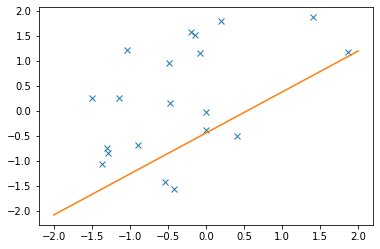

In [ ]:
coef=rd.uniform(-1,1,[2])
print(coef)
poly=np.polynomial.Polynomial(coef.T)
plt.figure()
x=rd.uniform(-2,2,[20,2])
plt.plot(x[:,0],x[:,1],'x')

x1=np.linspace(-2,2,100)
plt.plot(x1,poly(x1))

plt.show()

#### Labeling the points '+' if they lie above the line and '-' if they are below. 

In [ ]:
y=np.zeros(len(x))
plus=[]
minus=[]

for i in range(x.shape[0]):
  val=poly(x[i][0])
  if np.sign(val-x[i][1])<0:
    y[i]=int(1)
    plus.append(x[i])
  else:
    y[i]=int(-1)
    minus.append(x[i])
plus=np.asfarray(plus)
minus=np.asfarray(minus)

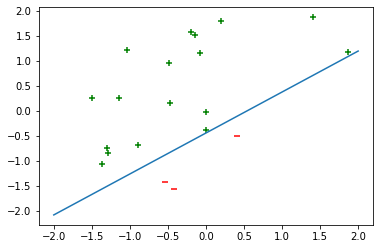

In [ ]:
plt.figure()

plt.scatter(plus[:,0],plus[:,1],c='g',marker='+')
plt.scatter(minus[:,0],minus[:,1],c='r',marker='_')
x1=np.linspace(-2,2,100)
plt.plot(x1,poly(x1))

#### the dataset and pla algorithm

In [ ]:
ds=np.append(x,y.reshape(len(y),1),axis=1)

In [ ]:
coeffPLA=pla(ds,1000)
coeffPLA=coeffPLA/coeffPLA[-1]
print('PLA Coefficients=',coeffPLA/coeffPLA[-1])

PLA converged after 8 iterations
PLA Coefficients= [ 0.69966574 -0.73812186  1.        ]


In [ ]:
polyPLA=np.polynomial.Polynomial(coeffPLA[0:2])


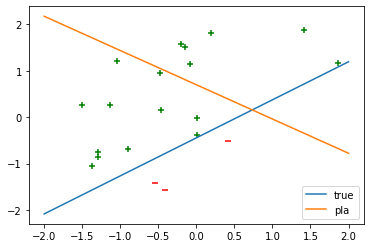

In [ ]:
plt.figure()

plt.scatter(plus[:,0],plus[:,1],c='g',marker='+')
plt.scatter(minus[:,0],minus[:,1],c='r',marker='_')
x1=np.linspace(-2,2,100)
plt.plot(x1,poly(x1),label='true')
plt.plot(x1,polyPLA(x1),label='pla')
plt.legend()

### EX. 1.5

### a. Learning
### b. while you could gather data on this problem, it's better suited for a design approach
### c.  Learning
### d. Again, while data could be gathered. there are better design approaches
### e. Learning



### EX. 1.6

### a. In general, this is the problem of recommender systems which has a deep research literature. Traditionally, it's treated as a supervised learning problem where data could be a customer's interest and buyer history, then the targets are the customer's next purchase. There is also active research into unsupervised recommender systems.

### b. reinforcement learning would likely be the best fit where the training data is how to play tic-tac toe along with a way to grade certain moves or board configurations.

### c. This is essentially a clustering problem which would be best suited for unsupervised learning where the input data is simply the info for each movie. If we are also given labels for each  movie, then it could be treated as a classification problem using supervised learning.

### d. This is fairly broad, so it could be any learning method based on the data. Suppose the input data is the rules of music composition with music scores as targets, then supervised learning is approriate. If we are given the rules of composition and a way to grade the output music scores, then reinforcement learning would work. Finally, if we are only given the rules of composition, then unsupervised learning would be the best fit.

### e. This is a supervised learning regression problem where the training data is customer data such as credit score, age, income, etc. with targets of the maximum allowed credit of thos customers.






### EX. 1.10
### a. Since all the coins are fair, the actual frequency is $\mu=0.5$.

In [ ]:
#b.
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rd


def flipCoins(numCoins,numFlips):
  #Flips a set of coins 'numFlips' times and measures the frequency of heads for 3 of the coins

  countHeads=np.zeros(numCoins)
  
  for i in range(numFlips):
    probs= rd.uniform(size=[numCoins])
    probs[probs>0.5]=1
    probs[probs<0.5]=0
    countHeads=countHeads+probs

  #print(countHeads)

  firstCoin=countHeads[0]/numFlips
  randCoin=rd.choice(countHeads)/numFlips
  minCoin=countHeads[np.argmin(countHeads)]/numFlips

  #print('first coin frequency=',firstCoin,'----- random coin frequency=',randCoin,'----- minimum frequency=',minCoin)

  return firstCoin,randCoin,minCoin


#test with 1000 coins being flipped 10 times
flipCoins(1000,10)

(0.6, 0.6, 0.0)

In [ ]:
#running experiment with 1000 coins being flipped 10 times over 100000 trials

numTrials=100000
numCoins=1000
numFlips=10

firstCoin=[]
randCoin=[]
minCoin=[]

for i in range(numTrials):
  vals=flipCoins(numCoins,numFlips)
  firstCoin.append(vals[0])
  randCoin.append(vals[1])
  minCoin.append(vals[2])


firstCoin=np.asfarray(firstCoin)
randCoin=np.asfarray(randCoin)
minCoin=np.asfarray(minCoin)

(array([  117.,     0.,   953.,     0.,  4410., 11757.,     0.,     0.,
        20377.,     0., 24559., 20543.,     0., 11778.,     0.,     0.,
         4461.,     0.,   950.,    95.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

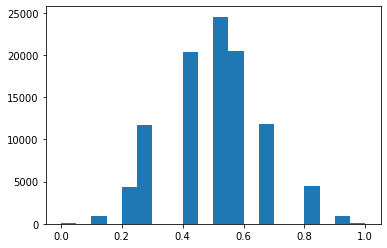

In [ ]:
#histogram for first coin
plt.hist(firstCoin,bins=20)

(array([  101.,     0.,  1056.,     0.,  4465., 11508.,     0.,     0.,
        20494.,     0., 24755., 20486.,     0., 11638.,     0.,     0.,
         4410.,     0.,   985.,   102.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

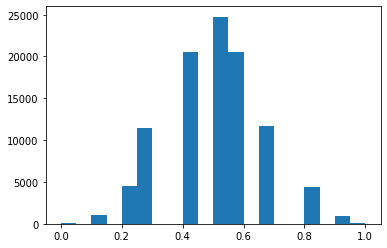

In [ ]:
#histogram for random coin
plt.hist(randCoin,bins=20)

(array([6.2385e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.7612e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]),
 <a list of 20 Patch objects>)

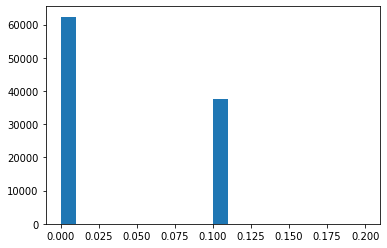

In [ ]:
#histogram for minimum frequency coin
plt.hist(minCoin,bins=20)

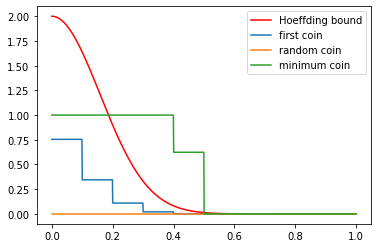

In [ ]:
#c


def hoeffBound(epsilon,N):
#function to compute the hoeffding bound given epsilon values and numbr of samples N
  return 2*np.exp(-2*N*epsilon**2)

epsilon=np.linspace(0,1,1000)
vals=hoeffBound(epsilon,10)
plt.plot(epsilon,vals,'r',label='Hoeffding bound')

#subtracting actual frequency
firstCoin=firstCoin-0.5
randCoin=randCoin-0.5
minCoin=minCoin-0.5

b1=np.zeros(len(epsilon))
brand=np.zeros(len(epsilon))
bmin=np.zeros(len(epsilon))
#finding the actual number of occurances of the 'bad event'
for i in range(len(epsilon)):
  eps=epsilon[i]
  b1[i]=np.sum(np.abs(firstCoin)>eps)
  randCoin[i]=np.sum(np.abs(brand)>eps)
  bmin[i]=np.sum(np.abs(minCoin)>eps)

#The actual probabilites of a 'bad' event occuring

p1=b1/numTrials
prand=brand/numTrials
pmin=bmin/numTrials

plt.plot(epsilon,p1,label='first coin')
plt.plot(epsilon,prand,label='random coin')
plt.plot(epsilon,pmin,label='minimum coin')
plt.legend()

### d. From the plot it's clear that the first coin and radnom coin obey the inequality while the coin with the minimum frequency does not. This follows from the assumption described on pg. 22 of the text that 'h is fixed before you generate the dataset'. For the first and random coins, the choice of coin is independent of the the flips themselves. On the other hand, the minimum frequency coin depends directly on the outcome of the flips which viloates the assumption. 
### e. Figure 1.10 displays the multiple bins which represent the M hypotheses. The first and random coin correspond to picking 2 bins, the 1st bin and a random one, beofore any marbles are removed. On the other hand, the minimum frequency coin is akin looking at the results from all the bins and picking the one with a certain criteria which in this case is the bin with the minimum frequency.

## *Pattern Recognition and Machine Learning*



### 1.1

###Eq.'s 1.1 and 1.2 are
###<center>$y(x,\vec{w})=∑_{j=0}^{M}w_{j}\vec{x}^{j}$</center>
###<center>$E(\vec{w})=\frac{1}{2}∑_{n=1}^{N}[y(x_{n},\vec{w})-t_{n}]^{2}$</center>
### Plugging 1.1 into 1.2 gives 
### <center>$E(\vec{w})=\frac{1}{2}∑_{n=1}^{N}[∑_{j=0}^{M}w_{j}\vec{x}^{j}-t_{n}]^{2}$</center>
### Differentiating with respect to the weight vector $\vec{w}$ gives 
<center> $\frac{∂E(\vec{w})}{∂\vec{w}}=∑_{n=1}^{N}(∑_{j=0}^{M}\vec{w}x_{n}^{j}-t_{n})x_{n}^{i} $</center>

### The minimum of the error function occurs at $\frac{∂E(\vec{w})}{∂\vec{w}}=0$, so
### <center> $∑_{n=1}^{N}(∑_{j=0}^{M}\vec{w}x_{n}^{j}-t_{n})x_{n}^{i}=0 $ </center>
### <center>$∑_{n=1}^{N}(∑_{j=0}^{M}\vec{w}x_{n}^{j+i}-t_{n}x_{n}^{i})=0 $</center>
### <center> $∑_{n=1}^{N}∑_{j=0}^{M}\vec{w}x_{n}^{j+i}=∑_{n=1}^{N}t_{n}x_{n}^{i}$ </center>

### Allowing $A_{ij}=\sum_{n=1}^{N}x_{n}^{i+j}$ and $T_{i}=∑_{n=1}^{N}x_{n}^{i}t_{n}$ gives the desired result 
### <center>$∑_{j=0}^{M}A_{ij}w_{j}=T_{i}$</center>

### 1.5

### Eq. 1.38 states that $var[f]$ is given by 
### <center>$var[f]=E[(f(x)-E[f(x)])^{2}]$</center>
### which gives 
### <center>$var[f]=E[(f(x))^{2}-2f(x)E[f(x)]+E[f(x)]^{2}]$</center>
### By exploiting the linearity of the expectation operator and the fact that $E[f(x)]$ is a constant gives
### <center>$var[f]=E[f(x)^{2}]-2E[f(x)]^{2}+E[f(x)]^{2}$</center>
### <center>$var[f]=E[f(x)^{2}]-E[f(x)]^{2}$</center>


### 1.6

### The covariance of two variable, x and y, is given by
### <center>$cov[x,y]=E_{x,y}[xy]-E[x]E[y]$</center>
### the expectation of xy is given by 
### <center>$E_{x,y}=∫∫xy[p(x,y)]dxdy$</center>
### however the probability p(x,y) for two independent varialbe is simply p(x,y)=p(x)p(y), so
### <center>$E_{x,y}=∫∫xy[p(x)p(y)]dxdy$</center>
### <center> $=[∫xp(x)dx][∫yp(y)dy]$</center>
### <center> $=E[x]E[y]$</center>
### so we have
### <center>$cov[x,y]=E_{x,y}[xy]-E[x]E[y]=E[x]E[y]-E[x]E[y]=0$</center>


### 1.9

### The single variable Gaussian distribution is given by
### <center>$N(x|μ,σ^2)=\frac{1}{\sqrt{2\piσ^2}}e^{-\frac{1}{2\sigma^2}(x-μ)^2}$</center>
### Taking the derivative with respect to x gives
### <center>$\frac{∂N}{∂x}=\frac{1}{\sqrt{2\piσ^2}}(-\frac{1}{σ^2}(x-\mu))e^{-\frac{1}{2\sigma^2}(x-μ)^2}$</center>
### <center>$=-\frac{x-μ}{σ^2}N(x|μ,σ^2)$</center>
### The max value occurs where $\frac{∂N}{∂x}=0$,
### <center>$-\frac{x-μ}{σ^2}N(x|μ,σ^2)=0$</center>
### the gaussian distribution is zero nowhere, so  $\frac{∂N}{∂x}=0$ occurs only when $\frac{x-μ}{\sigma^2}=0$ which clearly occurs when $x=\mu$.

### The multivariable case is almost identical. The distribution is given by 
### <center>$N(\vec{x}|\vec{μ},𝚺)=\frac{1}{(2\pi)^{D/2}}\frac{1}{|𝚺|^{1/2}}e^{-\frac{1}{2}(\vec{x}-\vec{μ})^T𝚺^{-1}(\vec{x}-\vec{μ})}$</center>
### The partial derivative with respect to $\vec{x}$ is 
### <center>$\frac{∂N}{∂x}=-\frac{1}{2}∇[(\vec{x}-\vec{μ})^T𝚺^{-1}(\vec{x}-\vec{μ})]N(\vec{x}|\vec{μ},𝚺)$</center>
### <center>$=-𝚺^{-1}(\vec{x}-\vec{μ})]N(\vec{x}|\vec{μ},𝚺)$</center>
### the gaussian distribution is zero nowhere, so  $\frac{∂N}{∂x}=0$ occurs only when $\vec{x}-\vec{μ}=0$ which clearly occurs when $\vec{x}=\vec{\mu}$.



### 1.11

### The log liklihood is given by 
### <center>$ln(p(\vec{x}|\mu,\sigma^2)=-\frac{1}{2\sigma^2}∑_{n=1}^{N}(x_n-\mu)^2-\frac{N}{2}ln(σ^2)-\frac{N}{2}ln(2\pi)$</center>
### For $\mu$:
### <center>$\frac{∂}{∂μ}ln(p(\vec{x}|\mu,\sigma^2)=\frac{1}{σ^2}∑_{n=1}^{N}(x_n-\mu)$</center>

### $μ_{max}$ is then given by
### <center>$\frac{1}{σ^2}∑_{n=1}^{N}(x_n-\mu_{max})=0$</center>
### <center>$∑_{n=1}^{N}(x_n-\mu_{max})=0$</center>
### <center>$∑_{n=1}^{N}(x_n)-N\mu_{max}=0$</center>
### <center>$\mu_{max}=\frac{1}{N}∑_{n=1}^{N}x_n$</center>

### For $\sigma^2$:
### <center>$\frac{∂}{∂\sigma^2}ln(p(\vec{x}|\mu,\sigma^2)=\frac{1}{2(σ^2)^2}∑_{n=1}^{N}(x_n-\mu)^2-\frac{N}{2\sigma^2}$</center>
### The max value of $\sigma^2$ is given by
### <center> $\frac{1}{2σ_{max}^4}∑_{n=1}^{N}(x_n-\mu_{max})^2-\frac{N}{2\sigma_{max}^2}=0$</center>
### <center>$\frac{1}{σ_{max}^2}∑_{n=1}^{N}(x_n-\mu_{max})^2-{N}=0$</center>
### <center>${σ_{max}^2}=\frac{1}{N}∑_{n=1}^{N}(x_n-\mu_{max})^2$</center>



### 1.12

### Eq.'s 1.49 and 1.50 are
### <center>$E[x]=∫_{-∞}^{∞}N(x|\mu,\sigma^2)xdx=μ$</center>
### <center>$E[x^2]=∫_{-∞}^{∞}N(x|\mu,\sigma^2)x^2dx=\mu^2+\sigma^2$</center>

### Clearly when n=m we have $x_nx_m=x_n^2$, so from 1.50 we know $E[x_n^2]=\mu^2+\sigma^2$. When $n\ne m$, eq. 1.49 gives $E[x_nx_m]=\mu^2$. Putting these two results together yields
### <center>$E[x_nx_m]=\mu^2+I_{nm}\sigma^2$</center>
where $I_{nm}=1$ when n=m and zero otherwise. 

### Now condsider the expectations of $\mu_{ML}$ and $\sigma_{ML}^2$. The first expectation follows directly from eq. 1.49
###<center>$E[\mu_{ML}]=\mu$</center>
###The second requires using eq.'s 1.55 and 1.56
### ### <center>$\mu_{ML}=\frac{1}{N}∑_{n=1}^{N}x_n$</center>
### <center>${σ_{ML}^2}=\frac{1}{N}∑_{n=1}^{N}(x_n-\mu_{ML})^2$</center> 
### which lead us to
### <center>$E[\sigma_{ML}^2]=\frac{1}{N}E[∑_{n=1}^{N}(x_n-\frac{1}{N}\sum_{m=1}^{N}x_m)^2]$</center>
### <center>$=\frac{1}{N}\sum_{n=1}^{N}E[x_n^2-\frac{2}{N}x_n\sum_{m=1}^{N}x_m+\frac{1}{N^2}\sum_{m=1}^{N}\sum_{l=1}^{N}x_mx_l]$</center>
### <center>$=[\mu^2+\sigma^2-2(\mu^2+\frac{1}{N}\sigma^2)+\mu^2+\frac{1}{N}\sigma^2]$</center>
### <center>$=(\frac{N-1}{N})\sigma^2$</center>
### which is the desired result.